
# Parametrización de curvas e superficies


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Mon Feb  5 22:26:04 2024



### Obxectivos

 Presentar para introducir os conceptos de:
-  Parametrización de curvas
-  Parametrización de superficies

E asocialas ás traxectorias de móbiles na física clásica e ás gráficas das funcións escalares.

Tamén adiantaremos cálculos como a lonxitude dunha liña.


In [2]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')


### Parametrización de curvas

 Considera a seguinte función:

 $$
 {\bf r} (t) = \left( r \cos \omega \,t \, , \; r \sin \omega \, t \right)
 $$

 Observa que **é unha función vectorial** de $t \in \mathbb{R} \mapsto {\bf r}(t) \in \mathbb{R}^2$.

 Podes asociar esta función coa traxectoria dun móbil ao longo dun círculo de raio $r$ con velocidade angular $\omega$ onde $t$ sería o tempo.

 Tamén se trata da parametrización dun círculo de raio $r$.



Na seguinte cela debuxamos esta traxectoria, a circunferencia, con *Python*. Por comodidade tomaremos $r = 1, \, \omega = 1$ e $t$ cubrirá o intervalo $[0, 2 \pi]$. Mira o código.


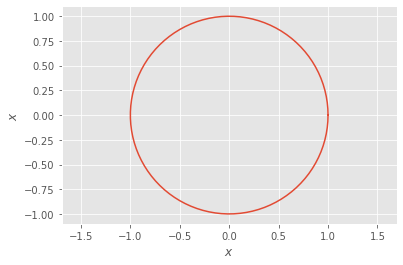

In [3]:
ts = np.linspace(0., 2*np.pi, 100)
r, w = 1., 1.
xs = r * np.cos(w * ts)
ys = r * np.sin(w * ts)
plt.plot(xs, ys);
plt.xlabel('$x$'); plt.ylabel('$x$'); plt.axis('equal');


En xeral, podemos expresar unha curva no espazo, sempre que non se corte a si mesma, mediante unha función vectorial que asigna a valores adxacentes de $t$ dentro dun intervalo, intervalo, $[t_0, t_{e}]$ de $\mathbb{R}$, puntos contiguos, ${\bf r}(t)$, no espazo $\mathbb{R}^n$, con $n >1$.

Estou seguro de que en física xa parametrizaches previamente varias traxectorias, círculos, parábolas, hélices e outros, en función de $t$, que era *o tempo*.



A seguinte parametrización corresponde a unha hélice no eixo $z$:

$$
 {\bf r} (t) = \left( r \cos \omega \,t \, , \; r \sin \omega \, t , \; v_z \, t \right)  
$$


Ou tamén a un móbil, unha partícula, que xira nun círculo de raio $r$ e velocidade angular $\omega$ no plano $(x, y)$ mentres avanza no tempo $t$, ao longo do eixe $z$ coa velocidade $v_z.$

Debuxémolo. Por comodidade tomamos $r = 1, \omega =1, v_z =1$ e $t = [0, 8 \pi]$. É dicir, debuxamos catro voltas da circumferencia.


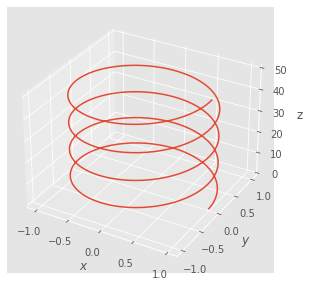

In [4]:
ts = np.linspace(0., 8*np.pi, 400)
r, w, vz = 1., 1., 2.
xs = r  * np.cos(w * ts)
ys = r  * np.sin(w * ts)
zs = vz * ts
fig = plt.figure(); 
ax  = plt.axes(projection = '3d') 
#ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs)
plt.xlabel('$x$'); plt.ylabel('$y$'); ax.set_zlabel('z'); #plt.axis('equal')
plt.tight_layout();


**Explora** como cambia a traxectoria variando os parámetros $r, \omega, v_z$ e o intervalo de $t$.



**Exercicio**: Tenta parametrizar e debuxar a traxectoria descrita por un punto nunha roda de raio $r$ dunha bicicleta cando se despraza horizontalmente e en liña recta coa velocidade $v_x$.



*solución* :

Nun período $T$ un punto da roda percorreu $2 \pi r $ que corresponde á distancia que o centro da roda se moveu nun $x$ que é $v_x T$ (polo que $2\pi r = v_x T$).

Se resolvemos para a frecuencia de rotación: $ \omega = 2 \pi /T = v_x /r$.

O punto comeza en $(0, 0)$ e o centro da roda está en $(0, r)$.

Entón temos:

$
x(t) = v_x t - r \sin(\omega t) = v_x t - r \sin(v_x t/r) 
$

$
y(t) = r - r \cos(\omega t) =r \, [1 - \cos(v_x t/r)]
$

É un *cicloide* .


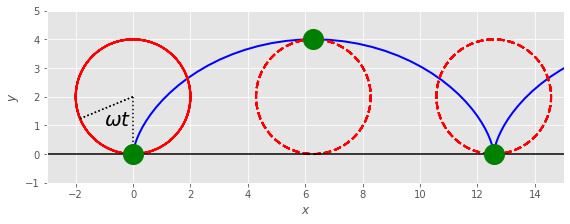

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
v, r = 1., 2.
ts = np.linspace(0., 8*np.pi*r, 200)
xs = v*ts - r* np.sin(v*ts/r)
ys = r*(1-np.cos(v*ts/r))
## draw the trajectory
ax.plot(xs, ys, color='blue', lw=2)
xxs = r*np.sin(v*ts/r)
## draw the wheel
ax.plot(xxs, ys, color='red', lw=2)
ax.plot(xxs+r*np.pi, ys, color='red', linestyle='dashed', lw=2)
ax.plot(xxs+2*r*np.pi, ys, color='red', linestyle='dashed', lw=2)
## draw the angle
plt.plot([0,0],[0,r],color="black",linestyle="dotted")
plt.plot([-r*np.cos(pi/8),0],[r-r*np.sin(pi/8),r],color="black",linestyle="dotted")
plt.plot([-r*np.cos(pi/8),0],[r-r*np.sin(pi/8),r],color="black",linestyle="dotted")
plt.text(-1,1,"$\omega t$",size=20)
## draw the point
plt.axline([-2,0],[15,0],color="black")
plt.plot(0,0,'go',markersize=20) 
plt.plot(r*np.pi,2*r,'go',markersize=20) 
plt.plot(2*r*np.pi,0,'go',markersize=20)
#####
ax.set_ylim((-1., 12.)); ax.set_xlim((-3., 15.))
ax.set_xlabel('$x$'); ax.set_ylabel('$y$')
ax.set_aspect('equal'); fig.tight_layout(); ax.set_ylim(-1., 5.);



#### Lonxitude do arco

 Mira o código *de Python* co que debuxamos a circunferencia anteriormente. A figura *parece* unha circunferencia. Pero en realidade estamos debuxando segmentos que unen puntos da circunferencia, só que están tan preto que o resultado final está *preto* dun círculo.

 Na seguinte figura móstrase un apartado dese debuxo, onde marcamos os puntos para que se vexan con maior claridade os segmentos.


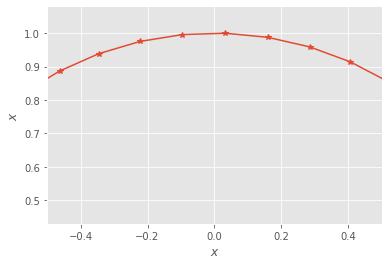

In [6]:
nbins = 50
ts = np.linspace(0., 2*np.pi, nbins)
r, w = 1., 1. 
xs = r * np.cos(w * ts)
ys = r * np.sin(w * ts)
plt.plot(xs, ys, '*-');
plt.xlabel('$x$'); plt.ylabel('$x$'); plt.axis( 'equal');
plt.xlim((-0.5, 0.5)); plt.ylim((0.5, 1.01));


Agora considera que queremos calcular a lonxitude da circunferencia a partir destes segmentos. Saberías como facelo? Bastaría con calcular a lonxitude de cada un destes segmentos e despois sumalos.

 Isto é o que facemos na seguinte cela. O erro que cometemos ao determinar a lonxitude depende do número de puntos cos que trazamos a circunferencia. Canto maior sexa o número de puntos, menor será o erro.

 **Explorar** : cantos puntos son necesarios para ter un erro inferior a 1 por cen mil.


In [7]:
circunferencia = 0.
for i in range(1, nbins):
    dx = xs[i] - xs[i-1]
    dy = ys[i] - ys[i-1]
    dr = np.sqrt(dx*dx + dy*dy)
    circunferencia += dr
print('lonxitude da circunferencia ', circunferencia)
print('a lonxitud dunha circunferencia de raio unidade é ', 2* np.pi)

lonxitude da circunferencia  6.27888155810987
a lonxitud dunha circunferencia de raio unidade é  6.283185307179586



Neste caso, dado que as funcións compoñentes da función vectorial son funcións unidimensionais, xa sabemos operar con elas, derivalas e facer a súa expansión de Taylor.

Consideremos a parametrización do círculo con raio $r$, $\omega = 1$ e intervalo de tempo $[0, 2\pi]$.

As derivadas das funcións dos compoñentes son:

$$
x(t) = r \cos  t   \rightarrow x'(t) = - r \sin  t 
$$

$$
y(t) = r \sin  t   \rightarrow y'(t) =   r \cos  t 
$$


E a partir deles, facemos a expansión de Taylor de primeira orde, desde un tempo $t_0$ ata un tempo próximo $t_0 + \Delta t$, onde $\Delta t$ é "pequeno".

$$
x(t_0 + \Delta t)  = x(t_0) - r  \sin  t_0  \; \Delta t 
$$

$$
y(t_0 + \Delta t)  = y(t_0) + r  \cos  t_0  \; \Delta t 
$$



Polo tanto, a distancia entre dous puntos é:

$$ 
\Delta r   = || {\bf r}(t_0 + \Delta t) - {\bf r}(t_0) || 
$$

$$
\Delta r = \sqrt{r^2  \sin^2 t_0 + r^2 \cos^2 t_0} \, \Delta t = r \, \Delta t
$$



Se a diferenza de intervalos de tempo é infinitesimal, $\Delta t \rightarrow \mathrm{d} t$, a suma de todos os segmentos, $s$, pasa a ser a integral en $t$ entre os extremos do seu intervalo $ [0, 2 \pi)$.

$$
s = \int_{0}^{2 \pi} r \mathrm{d}t = r \, t \, \big|_{0}^{2 \pi} = 2 \pi r 
$$


E obtemos a lonxitude dun círculo, $2 \pi r$.



Sexa entón unha liña ${\bf r}(t)$ nun espazo $\mathbb{R}^n$, con $n>1$, parametrizada como función dunha variable real $t$ que toma valores no intervalo $[t_0, t_e]$, podemos dar a súa **lonxitude de arco**, $s$, pola integral nunha dimensión:

$$
s = \int_{t_0}^{t_e} || {\bf r}' (t) || \, \mathrm{d}t
$$

onde:

$$
{\bf r}' (t) = \left( x'_1(t), \dots, x'_n(t) \right)
$$

*Nota* : Fíxate que ${\bf r}'(t)$ no caso en que $t$ é o tempo e ${\bf r}(t)$ a traxectoria dun móbil ao longo do tempo é *a velocidade* !



**Pregunta** : Considera agora a parametrización previa da hélice. Podes calcular a súa lonxitude de arco?

 Ademais, poderías *volver parametrizar* a hélice pero agora usando a súa lonxitude?

 Para iso, imaxina que se trata dun móbil que percorre a hélice con velocidade angular $\omega = 1$ e velocidade en $z$, $v_z = 1$. Podes dicir onde está o móbil na hélice cando percorreu unha distancia $s$? É dicir, podes dar ${\bf r}(s)$, onde $s$ é a lonxitude percorrida?



### Introdución á parametrización de superficies

 Observa a seguinte figura. É a superficie do lado dun cilindro vertical cunha base igual a un disco. Observa como se debuxa a superficie.


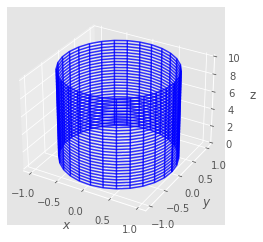

In [8]:
phis = np.linspace(0., 2*np.pi, 30)
zs   = np.linspace(0.,      10, 30)
pms, zms = np.meshgrid(phis, zs)
r = 1.
xms = r  * np.cos(pms)
yms = r  * np.sin(pms)
fig = plt.figure(); ax  = plt.axes(projection = '3d') # ax = fig.gca(projection='3d')
ax.plot_wireframe(xms, yms, zms, color = 'blue', alpha = 0.8)
plt.xlabel('$x$'); plt.ylabel('$y$'); ax.set_zlabel('z'); #ax.set_aspect('equal')


Se cortas a parede do cilindro ao longo dunha liña vertical e o despregases, terías unha folla cadrada.

 Poderiamos facer o proceso ao revés. Collemos unha folla de cuadrícula, cuxas coordenadas podemos chamar $(u, v)$, e rodámola ata obter un cilindro. Podemos dar cada punto do espazo do cilindro $(x, y, z)$ desde $(u, v)$.

 É dicir, a superficie lateral do cilindro pódese dar, parametrizada, como **función vectorial** de dúas variables $(u, v)$.



En xeral, podemos especificar unha superficie no espazo mediante unha función vectorial, $\sigma(u, v)$, que asocia puntos contiguos $(u, v)$ nunha rexión $\mathcal{R}$ de $\mathbb {R}^2$ a puntos adxacentes no espazo tridimensional, $\mathbb{R}^3$.

$$
(u, v) \in \mathcal{R} \subset \mathbb{R}^2 \mapsto \left( x(u,v), \; y(u, v), \; z(u, v) \right) \in \mathbb{R}^3
$$



No caso do cilindro, as variables iniciais son $(\phi, z)$ e a rexión, $\mathcal{R}$ defínese polos intervalos $z \in [0, 10]$ e $\phi \in [0, 2 \pi)$. A superficie está parametrizada coa seguinte función:

 $$
 \sigma(z, \phi) = \left( r \cos \phi, \; r \sin \phi, \; z \right)
 $$

 onde $r$ é unha constante. Neste caso, $x$ e $y$ non dependen de $z$, só de $\phi$.



Xa viramos algo semellante coas gráficas dunha función escalar, $f(x, y)$.

 Observa a seguinte gráfica e a rexión $\mathcal{R}$ no plano $(x, y)$.


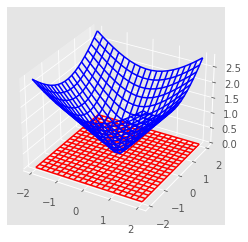

In [9]:
xs  = np.linspace(-2., 2., 20)
ys  = np.linspace(-2., 2., 20)
xms, yms = np.meshgrid(xs, ys)
rms =  np.sqrt( xms*xms + yms*yms)
fig = plt.figure(); ax = plt.axes(projection='3d')
ax.plot_wireframe(xms, yms,    rms, color='blue')
ax.plot_wireframe(xms, yms, 0.*rms, color='red' );
#ax.set_aspect('equal');


Neste caso, a rexión $\mathcal{R} = [-2, 2] \times [-2, 2]$ é a área en vermello, e as variables $(u, v)$ son simplemente $(x, y )$. A superficie é azul e a súa parametrización é moi sinxela:

 $$
 \sigma(x, y) = \left(x, y, \sqrt{x^2 + y^2} \right)
 $$

 Polo tanto, unha gráfica dunha función é tamén a parametrización da súa superficie.



**Exercicio** : Observa a seguinte figura e estuda o código *Python* que o crea. Esta é a parametrización dunha esfera de raio unitario.

 Que interpretación dás ás variables *phis* e *thetas* do código? Podes reescribir matematicamente, é dicir, dar a rexión $\mathcal{R}$ onde se definen as variables $(\theta, \phi)$ e a parametrización $\sigma (\theta, \phi)$ da esfera?


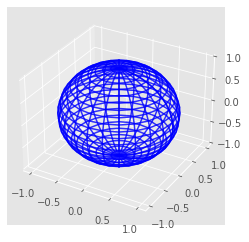

In [10]:
thetas  = np.linspace(0.,    np.pi, 25)
phis    = np.linspace(0,  2.*np.pi, 25)
thetams, phims = np.meshgrid(thetas, phis)
r  = 1.
xms  = r * np.sin(thetams) * np.cos(phims)
yms  = r * np.sin(thetams) * np.sin(phims)
zms  = r * np.cos(thetams)
fig = plt.figure(); ax = plt.axes(projection='3d')
ax.plot_wireframe(xms, yms, zms, color='blue', alpha = 0.8); 



*solución* : A rexión $\mathcal{R}$ vén dada polas variables $\theta, \phi$ que toman valores nos intervalos $\theta \in [0, \pi]$ e $\phi \in [0 , 2 \pi)$.

 A parametrización da esfera, $\sigma (\theta, \phi)$, con raio $r$, é:

 $$
 x(\theta, \phi) = r \, \sin \theta \, \cos\phi
 $$

 $$
 y(\theta, \phi) = r \, \sin \theta \, \sin \phi
 $$

 $$
 z(\theta, \phi) = r \, \cos \theta \
 $$



*No caso de que che axude* :

 Parametrizar unha superficie no espazo é coma se tivésemos un material plano imaxinario que puidésemos recortar, para ter unha rexión $\mathcal{R}$, e que logo poderiamos dar forma, comprimir ou expandir a vontade no espazo para crear con el a superficie $\sigma$.

 No caso de que non comprimamos nin estiramos ese material imaxinario, a área superficial, $\sigma$, corresponde á área da rexión $\mathcal{R}$. É o caso da parede do cilindro do exemplo anterior. Pero non a esfera, xa que para darlle forma con ese material máxico habería que comprimila e estirala.



Supoño que tes unha idea de como calcularemos as áreas das superficies parametrizadas, pero aínda non temos todas as ferramentas necesarias. Temos que esperar ao final do capítulo das integrais.


**Cónicas e cuádricas**


### Aínda hai máis!

 Supoño que sabes que unha partícula cargada cando entra nun campo magnético uniforme describe normalmente unha hélice, como a que debuxamos antes.

 Na física de partículas, a hélice xoga un papel fundamental.

 Mira esta imaxe dunha colisión de protóns no detector [ATLAS](https://atlas.cern) , onde se reconstrúen as traxectorias de diferentes partículas.

 As partículas están dentro dun campo magnético uniforme, polo que describen hélices. Con diferentes cargas as hélices xiran en sentidos opostos. Non ves hélices porque é a proxección no plano $(x, y)$ e porque non dan un xiro completo. As partículas máis enerxéticas teñen a hélice moi aberta e as menos enerxéticas a hélice máis pechada.


| |
|:--:|
|<img src="imgs/atlas_event.jpeg" width=400 align="center" />|
| Vista transversal dunha colisión no experimento ATLAS (CERN) |


A imaxe correspóndese cun dos primeiros eventos cun Higgs que tomou o detector ATLAS en xuño de 2012, onde o bosón de Higgs decae a dous muóns (en vermello) e dous electróns (en verde). Por suposto, hai moitas máis partículas que as que proceden do Higgs.



**Isto é todo por agora!**
